In [1]:
import os
import pandas as pd
import numpy as np
from scipy import interp
import re
from matplotlib import pyplot as plt
import cv2
from sklearn import svm, metrics, preprocessing
from sklearn.model_selection import cross_val_score, StratifiedKFold

VOCpath = 'subset\\VOCdevkit\\VOC2006\\ImageSets'
TrVapath = 'subset\\VOCdevkit\\VOC2006\\PNGImages'
home = os.getcwd()
vpath = os.path.join(home, VOCpath)
tvpath = os.path.join(home, TrVapath)

In [8]:
os.chdir(vpath)
cycle = np.array([int(re.split('  | ', line.strip())[1]) for line in open('bicycle_train.txt')])
bus = np.array([int(re.split('  | ', line.strip())[1]) for line in open('bus_train.txt')])
car = np.array([int(re.split('  | ', line.strip())[1]) for line in open('car_train.txt')])
cat = np.array([int(re.split('  | ', line.strip())[1]) for line in open('cat_train.txt')])
cow = np.array([int(re.split('  | ', line.strip())[1]) for line in open('cow_train.txt')])
dog = np.array([int(re.split('  | ', line.strip())[1]) for line in open('dog_train.txt')])
horse = np.array([int(re.split('  | ', line.strip())[1]) for line in open('horse_train.txt')])
bike = np.array([int(re.split('  | ', line.strip())[1]) for line in open('motorbike_train.txt')])
person = np.array([int(re.split('  | ', line.strip())[1]) for line in open('person_train.txt')])
sheep = np.array([int(re.split('  | ', line.strip())[1]) for line in open('sheep_train.txt')])

trainval = [line.strip() for line in open('train.txt')]
labels = np.vstack((cycle, bus, car, cat, cow, dog, horse, bike, person, sheep))

In [9]:
os.chdir(tvpath)
feature = np.float64([np.squeeze(cv2.resize(cv2.imread(file+'.png' , cv2.IMREAD_GRAYSCALE), (256,256), interpolation = cv2.INTER_AREA)).ravel() for file in trainval])
#img = cv2.resize(cv2.cvtColor(cv2.imread(file+'.jpg'), cv2.COLOR_BGR2GRAY), (256,256), interpolation = cv2.INTER_AREA)
classes = ['cycle', 'bus', 'car', 'cat', 'cow', 'dog', 'horse', 'bike', 'person', 'sheep']

print('Number of training & validation data:', feature.shape[0])
print('Number of training & validation features:', feature.shape[1])

Number of training & validation data: 1277
Number of training & validation features: 65536


-------------------- Class: cycle --------------------
	 ---------- Cross Validation -  0 ----------
Classification report for svm SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True,
  random_state=<mtrand.RandomState object at 0x000001FE7CDFA480>,
  shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.90      0.97      0.93       573
          1       0.14      0.05      0.07        66

avg / total       0.82      0.87      0.84       639


Confusion matrix:
[[554  19]
 [ 63   3]]
Accuracy 0.871674491393
	 ---------- Cross Validation -  1 ----------
Classification report for svm SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True,
  random_state=<mtrand.RandomState object at 0x000001FE7CDFA480>,
  shrinking

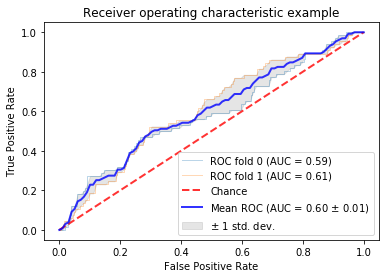

-------------------- Class: bus --------------------
	 ---------- Cross Validation -  0 ----------
Classification report for svm SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True,
  random_state=<mtrand.RandomState object at 0x000001FE7CDFA480>,
  shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       592
          1       0.41      0.19      0.26        47

avg / total       0.90      0.92      0.91       639


Confusion matrix:
[[579  13]
 [ 38   9]]
Accuracy 0.920187793427
	 ---------- Cross Validation -  1 ----------
Classification report for svm SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True,
  random_state=<mtrand.RandomState object at 0x000001FE7CDFA480>,
  shrinking=T

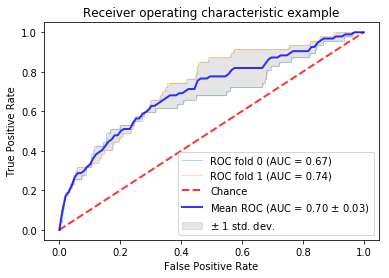

-------------------- Class: car --------------------
	 ---------- Cross Validation -  0 ----------
Classification report for svm SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True,
  random_state=<mtrand.RandomState object at 0x000001FE7CDFA480>,
  shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.82      0.87      0.84       500
          1       0.40      0.30      0.34       139

avg / total       0.73      0.75      0.74       639


Confusion matrix:
[[436  64]
 [ 97  42]]
Accuracy 0.748043818466
	 ---------- Cross Validation -  1 ----------
Classification report for svm SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True,
  random_state=<mtrand.RandomState object at 0x000001FE7CDFA480>,
  shrinking=T

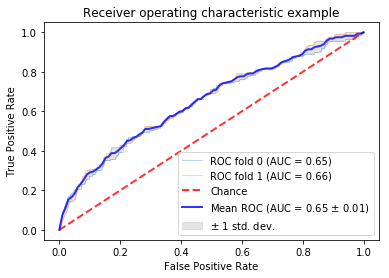

-------------------- Class: cat --------------------
	 ---------- Cross Validation -  0 ----------


In [ ]:
feature = preprocessing.scale(feature)
labels[labels >= 0] = 1
labels[labels < 0] = 0

cv = StratifiedKFold(n_splits=2)
random_state = np.random.RandomState(0)
classifier = svm.SVC(kernel='linear', C=1, probability=True, random_state=random_state)
#classifier = svm.SVC(kernel='linear', C=1, probability=True)

for idx, value in enumerate(classes):
    print("-"*20, 'Class:', value, "-"*20)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(feature, labels[idx]):
        print(" "*5, "-"*10, 'Cross Validation - ', i, "-"*10)
        classifier.fit(feature[train], labels[idx][train])
        probas_ = classifier.predict_proba(feature[test])
        predicted = classifier.predict(feature[test])
        print("Classification report for svm %s:\n%s\n" % (classifier, metrics.classification_report(labels[idx][test], predicted)))
        print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels[idx][test], predicted))
        print("Accuracy", metrics.accuracy_score(labels[idx][test], predicted))
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = metrics.roc_curve(labels[idx][test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
